In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error as MAPE

## 解題步驟：

1. 讀取 x_train.npy, y_train.npy, x_test.npy, y_test.npy
2. 將 training dataset 再切分為 training set, validation set (圖一)
3. 先以上課的知識調整出一個不會 over-fitting 太多的決策樹模型
4. 以 validation set 作為調整參數的基準，陸續調整其他參數 (請同學測試看看 validation 要佔多少比例，後續的調整會比較客觀)
5. 將最終調整結果與一開始的決策樹做比較，誤差是否有降低
6. 同學若也懂其他模型的知識也可以試試看一樣的做法比較看看

#### 圖一 (Train, Validation and Test)
<img src="./train_val_test.png" style="zoom:30%;" />

#### 圖二 (是我前後調整的結果)
<img src="./report.png" style="zoom:30%;" />

In [2]:
# Read data
""" Your code here """
X_train = np.load('x_train.npy')
Y_train = np.load('y_train.npy')
X_test = np.load('x_test.npy')
Y_test = np.load('y_test.npy')
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(1095, 89) (1095,) (365, 89) (365,)


In [19]:
def regression_report(DT, x_input, y_true, x_input_type):
    print(x_input_type)
    pred = DT.predict(x_input)
    print('  MAPE:',MAPE(pred, y_true))
    print('  MAE:',MAE(pred, y_true))
    print('  MSE:',MSE(pred, y_true))

## 請同學先依照上課的知識，調整一個沒有 overfitting 的決策樹，請以 mape 作為參考誤差指標，較容易看出關係

In [23]:
""" Your code here """
num =0.2
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = num)
DT = DecisionTreeRegressor().fit(x_train, y_train)
# train
regression_report(DT, x_train, y_train, 'Train')
# val
regression_report(DT, x_val, y_val, 'val')
# test
regression_report(DT, X_test, Y_test, 'Test')

Train
  MAPE: 0.0
  MAE: 0.0
  MSE: 0.0
val
  MAPE: 0.15261739818414266
  MAE: 26004.79908675799
  MSE: 1501933012.0776255
Test
  MAPE: 0.15608103059914055
  MAE: 29107.55890410959
  MSE: 2894947797.6684933


In [26]:
# Tuned regressior
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = num)
DT = DecisionTreeRegressor(max_depth=7, min_samples_split=5, min_samples_leaf=4,  random_state=1).fit(x_train, y_train)#加入max_leaf_nodes, max_feature的效果似乎不好
# train
regression_report(DT, x_train, y_train, 'Train')
# val
regression_report(DT, x_val, y_val, 'val')
# test
regression_report(DT, X_test, Y_test, 'Test')

Train
  MAPE: 0.08642473257945087
  MAE: 14545.65982947578
  MSE: 432960428.98546344
val
  MAPE: 0.14697533810977342
  MAE: 26532.872205419946
  MSE: 1468966363.947314
Test
  MAPE: 0.14973896827803843
  MAE: 28534.108831701436
  MSE: 2552239007.100131


In [ ]:
'''
参数含义：
1.criterion:string, optional (default="mse")
            它指定了切分质量的评价准则。默认为'mse'(mean squared error)。
3.max_depth:int or None, optional (default=None)
             指定树的最大深度。如果为None，则表示树的深度不限，直到
             每个叶子都是纯净的，即叶节点中所有样本都属于同一个类别，
             或者叶子节点中包含小于min_samples_split个样本。
4.min_samples_split:int, float, optional (default=2)
             整数或者浮点数，默认为2。它指定了分裂一个内部节点(非叶子节点)
             需要的最小样本数。如果为浮点数(0到1之间)，最少样本分割数为ceil(min_samples_split * n_samples)
5.min_samples_leaf:int, float, optional (default=1)
             整数或者浮点数，默认为1。它指定了每个叶子节点包含的最少样本数。
             如果为浮点数(0到1之间)，每个叶子节点包含的最少样本数为ceil(min_samples_leaf * n_samples)
7.max_feature:int, float, string or None, optional (default=None)
             可以是整数，浮点数，字符串或者None。默认为None。
             (1).如果是整数，则每次节点分裂只考虑max_feature个特征。
             (2).如果是浮点数(0到1之间)，则每次分裂节点的时候只考虑int(max_features * n_features)个特征。
             (3).如果是字符串'auto',max_features=n_features。
             (4).如果是字符串'sqrt',max_features=sqrt(n_features)。
             (5).如果是字符串'log2',max_features=log2(n_features)。
             (6).如果是None，max_feature=n_feature。
————————————————
版权声明：本文为CSDN博主「随遇而安_小强」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
原文链接：https://blog.csdn.net/qq_16000815/article/details/80954039

## 調整 決策樹參數
### 請同學從 criterion 的設定中，判斷這組資料集裡的 outlier 多嗎？

In [37]:
""" Your code here """
DT = DecisionTreeRegressor(criterion='mse').fit(x_train, y_train)
y_pred_val = DT.predict(x_val)
print('Val MAPE:',MAPE(y_pred_val, y_val))
print('Val MSE:',MSE(y_pred_val, y_val))
print('Val MAE:',MAE(y_pred_val, y_val))
# MAE似乎很大，但不知道多大才算大

Val MAPE: 0.14368710866794962
Val MSE: 1361971047.8
Val MAE: 24585.50909090909


## tuning max_depth

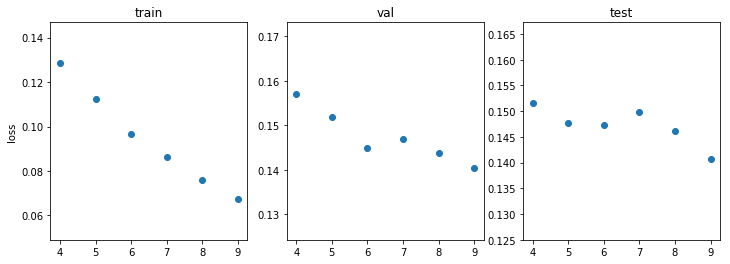

In [37]:
params = np.arange(4,10,1)
train_loss=np.zeros(len(params))
val_loss=np.zeros(len(params))
test_loss=np.zeros(len(params))

for i, param in enumerate(params):
    DT = DecisionTreeRegressor(max_depth=param, min_samples_split=5, min_samples_leaf=4,  random_state=1).fit(x_train, y_train)#加入max_leaf_nodes, max_feature的效果似乎不好
    # train
    y_pred = DT.predict(x_train)
    train_loss[i] = MAPE(y_pred, y_train)
    # val
    y_pred = DT.predict(x_val)
    val_loss[i] = MAPE(y_pred, y_val)
    # test
    y_pred = DT.predict(X_test)
    test_loss[i] = MAPE(y_pred, Y_test)
    
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.scatter(params, train_loss)
plt.title('train')
plt.ylabel('loss')

plt.subplot(1,3,2)
plt.title('val')
plt.scatter(params, val_loss)

plt.subplot(1,3,3)
plt.title('test')
plt.scatter(params, test_loss)

plt.show()

##  min_samples_split

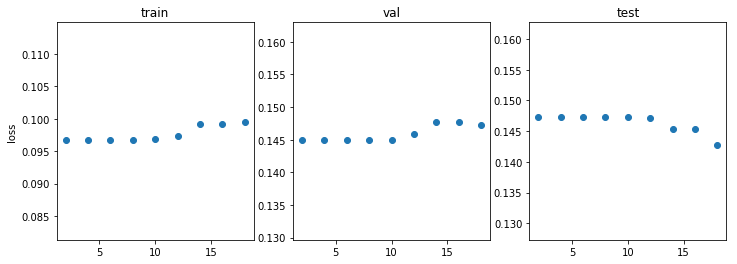

In [38]:
params = np.arange(2,20,2)
train_loss=np.zeros(len(params))
val_loss=np.zeros(len(params))
test_loss=np.zeros(len(params))

for i, param in enumerate(params):
    DT = DecisionTreeRegressor(max_depth=6, min_samples_split=param, min_samples_leaf=4,  random_state=1).fit(x_train, y_train)#加入max_leaf_nodes, max_feature的效果似乎不好
    # train
    y_pred = DT.predict(x_train)
    train_loss[i] = MAPE(y_pred, y_train)
    # val
    y_pred = DT.predict(x_val)
    val_loss[i] = MAPE(y_pred, y_val)
    # test
    y_pred = DT.predict(X_test)
    test_loss[i] = MAPE(y_pred, Y_test)
    
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.scatter(params, train_loss)
plt.title('train')
plt.ylabel('loss')

plt.subplot(1,3,2)
plt.title('val')
plt.scatter(params, val_loss)

plt.subplot(1,3,3)
plt.title('test')
plt.scatter(params, test_loss)

plt.show()

##  min_samples_leaf

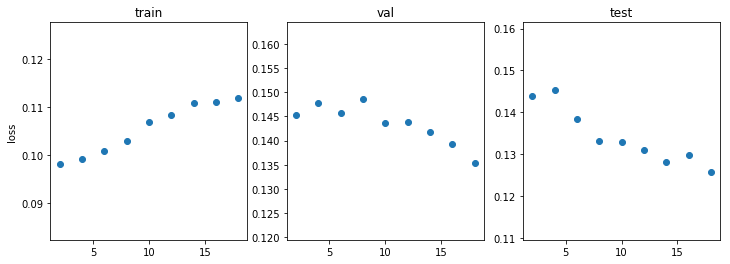

In [39]:
params = np.arange(2,20,2)
train_loss=np.zeros(len(params))
val_loss=np.zeros(len(params))
test_loss=np.zeros(len(params))

for i, param in enumerate(params):
    DT = DecisionTreeRegressor(max_depth=6, min_samples_split=14, min_samples_leaf=param,  random_state=1).fit(x_train, y_train)#加入max_leaf_nodes, max_feature的效果似乎不好
    # train
    y_pred = DT.predict(x_train)
    train_loss[i] = MAPE(y_pred, y_train)
    # val
    y_pred = DT.predict(x_val)
    val_loss[i] = MAPE(y_pred, y_val)
    # test
    y_pred = DT.predict(X_test)
    test_loss[i] = MAPE(y_pred, Y_test)
    
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.scatter(params, train_loss)
plt.title('train')
plt.ylabel('loss')

plt.subplot(1,3,2)
plt.title('val')
plt.scatter(params, val_loss)

plt.subplot(1,3,3)
plt.title('test')
plt.scatter(params, test_loss)

plt.show()

## max_features

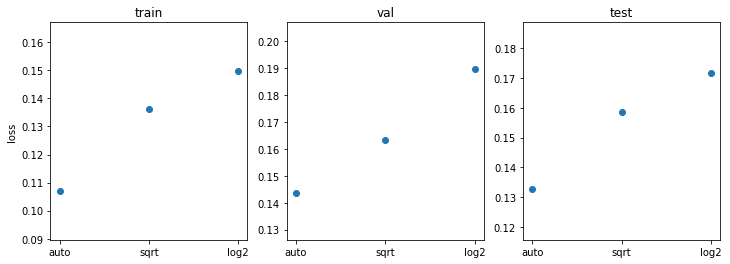

In [41]:
params = ['auto', 'sqrt', 'log2']
train_loss=np.zeros(len(params))
val_loss=np.zeros(len(params))
test_loss=np.zeros(len(params))

for i, param in enumerate(params):
    DT = DecisionTreeRegressor(max_depth=6, min_samples_split=14, min_samples_leaf=10,  max_features=param\
                               , random_state=1).fit(x_train, y_train)
    # train
    y_pred = DT.predict(x_train)
    train_loss[i] = MAPE(y_pred, y_train)
    # val
    y_pred = DT.predict(x_val)
    val_loss[i] = MAPE(y_pred, y_val)
    # test
    y_pred = DT.predict(X_test)
    test_loss[i] = MAPE(y_pred, Y_test)
    
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.scatter(params, train_loss)
plt.title('train')
plt.ylabel('loss')

plt.subplot(1,3,2)
plt.title('val')
plt.scatter(params, val_loss)

plt.subplot(1,3,3)
plt.title('test')
plt.scatter(params, test_loss)

plt.show()

## max_leaf_nodes

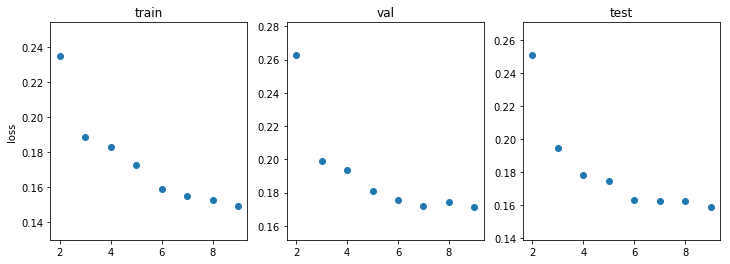

In [42]:
params = np.arange(2,10,1)
train_loss=np.zeros(len(params))
val_loss=np.zeros(len(params))
test_loss=np.zeros(len(params))

for i, param in enumerate(params):
    DT = DecisionTreeRegressor(max_depth=6, min_samples_split=14, min_samples_leaf=10,  max_features='auto'\
                               ,max_leaf_nodes=param,  random_state=1).fit(x_train, y_train)
    # train
    y_pred = DT.predict(x_train)
    train_loss[i] = MAPE(y_pred, y_train)
    # val
    y_pred = DT.predict(x_val)
    val_loss[i] = MAPE(y_pred, y_val)
    # test
    y_pred = DT.predict(X_test)
    test_loss[i] = MAPE(y_pred, Y_test)
    
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.scatter(params, train_loss)
plt.title('train')
plt.ylabel('loss')

plt.subplot(1,3,2)
plt.title('val')
plt.scatter(params, val_loss)

plt.subplot(1,3,3)
plt.title('test')
plt.scatter(params, test_loss)

plt.show()

## criterion

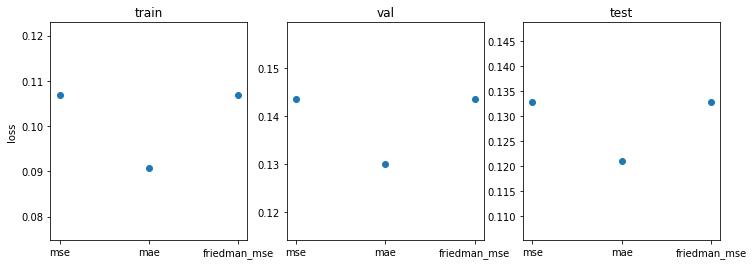

In [48]:
params = ['mse', 'mae', 'friedman_mse']
train_loss=np.zeros(len(params))
val_loss=np.zeros(len(params))
test_loss=np.zeros(len(params))

for i, param in enumerate(params):
    DT = DecisionTreeRegressor(max_depth=6, min_samples_split=14, min_samples_leaf=10,  max_features='auto'\
                               ,criterion=param, random_state=1).fit(x_train, y_train)
    # train
    y_pred = DT.predict(x_train)
    train_loss[i] = MAPE(y_pred, y_train)
    # val
    y_pred = DT.predict(x_val)
    val_loss[i] = MAPE(y_pred, y_val)
    # test
    y_pred = DT.predict(X_test)
    test_loss[i] = MAPE(y_pred, Y_test)
    
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.scatter(params, train_loss)
plt.title('train')
plt.ylabel('loss')

plt.subplot(1,3,2)
plt.title('val')
plt.scatter(params, val_loss)

plt.subplot(1,3,3)
plt.title('test')
plt.scatter(params, test_loss)

plt.show()

In [51]:
DT = DecisionTreeRegressor(max_depth=6, min_samples_split=14, min_samples_leaf=10,  max_features='auto'\
                               ,criterion = 'mae',  random_state=1).fit(x_train, y_train)#加入max_leaf_nodes的效果似乎不好
# train
regression_report(DT, x_train, y_train, 'Train')
# val
regression_report(DT, x_val, y_val, 'val')
# test
regression_report(DT, X_test, Y_test, 'Test')

Train
  MAPE: 0.09085263152226025
  MAE: 16372.366438356165
  MSE: 896672740.423516
val
  MAPE: 0.13009066798644658
  MAE: 22299.027397260274
  MSE: 922434925.9497716
Test
  MAPE: 0.12106871161192495
  MAE: 22367.47397260274
  MSE: 1353764170.9917808
